In [1]:
import dlib
print(dlib.cuda.get_num_devices())
print(dlib.DLIB_USE_CUDA)

1
True


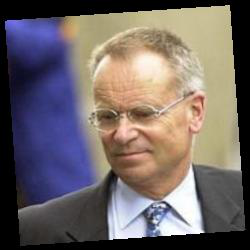

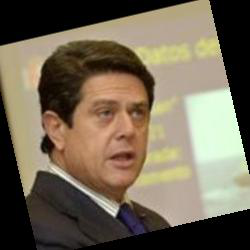

In [26]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from pprint import pprint

encoding = []

#image_path = "lfw-deepfunneled/lfw-deepfunneled/Ken_Watanabe/Ken_Watanabe_0001.jpg"
image_path = "lfw-deepfunneled/lfw-deepfunneled/Jeffrey_Archer/Jeffrey_Archer_0001.jpg"

test_image = face_recognition.load_image_file(image_path)
test_pil_image = Image.fromarray(test_image)

display(test_pil_image)

image_path2 = "lfw-deepfunneled/lfw-deepfunneled/Federico_Trillo/Federico_Trillo_0002.jpg"

test_image2 = face_recognition.load_image_file(image_path2)
test_pil_image2 = Image.fromarray(test_image2)

display(test_pil_image2)

#image = face_recognition.load_image_file(image_path)
#encodings = face_recognition.face_encodings(image)
#if len(encodings) == 0:
#    print("encodings is null")
#else:
#    encoding = encodings[0]

#pprint(encoding)

In [20]:
import csv
from pprint import pprint

PAIRS_CSV = "pairs.csv"
PEOPLE_CSV = "people.csv"
TEST_SET_CSV = "test_set.csv"

def file_lengthy(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1
print("Number of lines in the file: ",file_lengthy(PEOPLE_CSV))

with open(PEOPLE_CSV, newline='') as input_file, open(TEST_SET_CSV, "w") as test_set_file:
    input_reader = csv.reader(input_file)
    output_writer = csv.writer(test_set_file)
    next(input_reader)
    for row in input_reader:
        #print(len(row))
        if row[0] and row[1] and int(row[1]) > 1:
            #print(', '.join(row))
            output_writer.writerow(row)
            

        
    

Number of lines in the file:  5759


In [23]:
!ls lfw-deepfunneled/lfw-deepfunneled/Abel_Pacheco

Abel_Pacheco_0001.jpg  Abel_Pacheco_0003.jpg
Abel_Pacheco_0002.jpg  Abel_Pacheco_0004.jpg


In [34]:
import csv
from pprint import pprint
import timeit

import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

PAIRS_CSV = "pairs.csv"
PEOPLE_CSV = "people.csv"
TEST_SET_CSV = "test_set.csv"

FACE_DICT_SIZE = 1000
face_number = 0
known_face_encodings = []
known_face_names = []

time1 = timeit.default_timer()

with open(TEST_SET_CSV) as csv_file:
    input_reader = csv.reader(csv_file)
    for row in input_reader:
        if face_number >= FACE_DICT_SIZE:
            break
        people_name = row[0]
        image_path = "lfw-deepfunneled/lfw-deepfunneled/" + people_name + "/" + people_name + "_0001.jpg"
        #print(image_path)
        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image, model="cnn")
        if len(encodings) == 0:
            continue
        encoding = encodings[0]
        known_face_encodings.append(encoding)
        known_face_names.append(people_name)
        face_number += 1
        
time2 = timeit.default_timer()

print('time2 - time1: ', time2 - time1)



        
print("done!")
#pprint(known_face_encodings)
#pprint(known_face_names)

time2 - time1:  56.581157192995306
done!


In [36]:
face_number = 0
prediction_pass = 0
prediction_fail = 0
false_rejection = 0
false_acceptance = 0

FACE_DICT_SIZE = 1000
COMPARE_TOLERANCE = 0.55

with open(TEST_SET_CSV) as csv_file:
    input_reader = csv.reader(csv_file)
    for row in input_reader:
        if face_number >= FACE_DICT_SIZE:
            break
        people_name = row[0]
        unknown_image_path = "lfw-deepfunneled/lfw-deepfunneled/" + people_name + "/" + people_name + "_0002.jpg"
        unknown_image = face_recognition.load_image_file(unknown_image_path)
        unknown_face_encodings = face_recognition.face_encodings(unknown_image, model="cnn")
        if len(unknown_face_encodings) == 0:
            prediction_fail += 1
            print("Prediction fail for " + people_name)
            face_number += 1
            continue
        unknown_face_encoding = unknown_face_encodings[0]
        
        matches = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, COMPARE_TOLERANCE)
        
        predicted_name = "Unknown"
        
        face_distances = face_recognition.face_distance(known_face_encodings, unknown_face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            predicted_name = known_face_names[best_match_index]
            
            if predicted_name == people_name:
                prediction_pass += 1
            else:
                prediction_fail += 1
                false_acceptance += 1
                print("Prediction fail for " + people_name + " [" + predicted_name + "]")
        else:
            print("Prediction fail for " + people_name + " [" + predicted_name + "]")
            false_rejection += 1
            prediction_fail += 1
        face_number += 1
                
print("prediction_pass: " + str(prediction_pass))
print("prediction_fail: " + str(prediction_fail))
print("false rejection rate: " + "{:.1%}".format(false_rejection/face_number))
print("false acceptance rate: " + "{:.1%}".format(false_acceptance/face_number))
print("face_number: " + str(face_number))



Prediction fail for Antony_Leung [Kim_Jin-sun]
Prediction fail for Erika_Christensen [Unknown]
Prediction fail for Flor_Montulo [Nora_Bendijo]
Prediction fail for Francis_Ford_Coppola [Phan_Van_Khai]
Prediction fail for Geraldine_Chaplin [Unknown]
Prediction fail for Guy_Ritchie [Unknown]
Prediction fail for Hootie_Johnson [Don_Siegelman]
Prediction fail for Janica_Kostelic [Drew_Barrymore]
Prediction fail for Jeanne_Moreau [Unknown]
Prediction fail for Jeffrey_Archer [Unknown]
Prediction fail for Jodie_Foster [Unknown]
Prediction fail for John_Snow [Jacques_Chirac]
Prediction fail for Kim_Jong-Il [Kim_Jin-sun]
Prediction fail for Marlene_Weingartner [Petria_Thomas]
Prediction fail for Martha_Bowen [Unknown]
Prediction fail for Martina_Hingis [Conchita_Martinez]
Prediction fail for Matthew_Broderick [Unknown]
Prediction fail for Milo_Djukanovic [Unknown]
Prediction fail for Nora_Bendijo [Flor_Montulo]
Prediction fail for Phil_Gramm
Prediction fail for Saeb_Erekat
Prediction fail for To

In [ ]:
unknown_image_path = "lfw-deepfunneled/lfw-deepfunneled/Abel_Pacheco/Abel_Pacheco_0002.jpg"
unknown_image = face_recognition.load_image_file(unknown_image_path)

#face_locations = face_recognition.face_locations(unknown_image)
#face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

matches = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding)
#pprint(matches)

name = "Unknown"

face_distances = face_recognition.face_distance(known_face_encodings, unknown_face_encoding)
best_match_index = np.argmin(face_distances)

if matches[best_match_index]:
    name = known_face_names[best_match_index]
    
print(name)